In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load Dataset
# Replace 'employee_performance.csv' with your actual dataset file path
df = pd.read_csv('Employee_Performance_and_Productivity_Data.csv')

In [ ]:
# Data Overview
print(df.head())
print(df.info())
print(df.describe())

                                                                                           0.0  \
37370 Legal            Male   46 Analyst    2020-02-08 08:03:05.556036 4 High School 4  5600.0   
37371 Legal            Female 46 Specialist 2022-11-12 08:03:05.556036 1 Bachelor    5  6750.0   
37372 Operations       Female 53 Technician 2016-03-27 08:03:05.556036 8 Master      3  4550.0   
37373 Engineering      Female 49 Manager    2017-04-25 08:03:05.556036 7 High School 4  8400.0   
37374 Customer Support Female 51 Consultant 2016-02-03 08:03:05.556036 8 Bachelor    2  6600.0   

                                                                                        44  \
37370 Legal            Male   46 Analyst    2020-02-08 08:03:05.556036 4 High School 4  32   
37371 Legal            Female 46 Specialist 2022-11-12 08:03:05.556036 1 Bachelor    5  47   
37372 Operations       Female 53 Technician 2016-03-27 08:03:05.556036 8 Master      3  36   
37373 Engineering      Female 49 Ma

In [ ]:
# Load the CSV file, skipping the initial rows that appear to be metadata or part of a multi-index
# Based on the output of df.head() in cell A31kKg0SbbKW, it looks like the actual data starts from row 1 (index 0 after skipping)
df = pd.read_csv('Employee_Performance_and_Productivity_Data.csv', header=None, skiprows=1)

# Define the column names based on dataset structure observed after skipping rows
# Mapping from the original numerical column names in A31kKg0SbbKW output to meaningful names
# Correcting the number of column names to 20 to match the dataframe after skiprows=1
column_names = [
    'Employee ID', 'Department', 'Gender', 'Age', 'Job Title', 'Joining Date',
    'Experience Level', 'Education Level', 'Skill Score', 'Salary',
    'Hours Worked', 'Overtime Hours', 'Late Arrivals', 'Early Leaves',
    'Projects Completed', 'Awards Won', 'Trainings Attended', 'Certifications',
    'Performance Score', 'Satisfaction Level' # Removed 'Work From Home' to match 20 columns
]

# Assign the column names to the dataframe
df.columns = column_names

# Inspect the first few rows to ensure columns are assigned correctly
print(df.head())

# Drop rows with missing values if any
df = df.dropna()

# Convert selected columns to numeric
numeric_cols = ['Age', 'Experience Level', 'Skill Score', 'Salary', 'Hours Worked',
                'Overtime Hours', 'Late Arrivals', 'Early Leaves', 'Projects Completed',
                'Awards Won', 'Trainings Attended', 'Certifications', 'Performance Score', 'Satisfaction Level']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Convert 'Joining Date' to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'])


# Optionally, drop rows where conversion to numeric failed
df = df.dropna(subset=numeric_cols)

# Final inspection
print(df.info())
print(df.head())

   Employee ID        Department  Gender  Age   Job Title  \
0        37370             Legal    Male   46     Analyst   
1        37371             Legal  Female   46  Specialist   
2        37372        Operations  Female   53  Technician   
3        37373       Engineering  Female   49     Manager   
4        37374  Customer Support  Female   51  Consultant   

                 Joining Date  Experience Level Education Level  Skill Score  \
0  2020-02-08 08:03:05.556036                 4     High School            4   
1  2022-11-12 08:03:05.556036                 1        Bachelor            5   
2  2016-03-27 08:03:05.556036                 8          Master            3   
3  2017-04-25 08:03:05.556036                 7     High School            4   
4  2016-02-03 08:03:05.556036                 8        Bachelor            2   

   Salary  Hours Worked  Overtime Hours  Late Arrivals  Early Leaves  \
0  5600.0            32              12              0            13   
1  6750.

In [ ]:
# Derived Columns
# Productivity Index
# Optional: Task Efficiency if available, else assume 1
df['Task Efficiency'] = df.get('Task Efficiency', 1)
df['Productivity Index'] = (df['Performance Score'] * df['Satisfaction Level'] * df['Task Efficiency']) / df['Hours Worked']

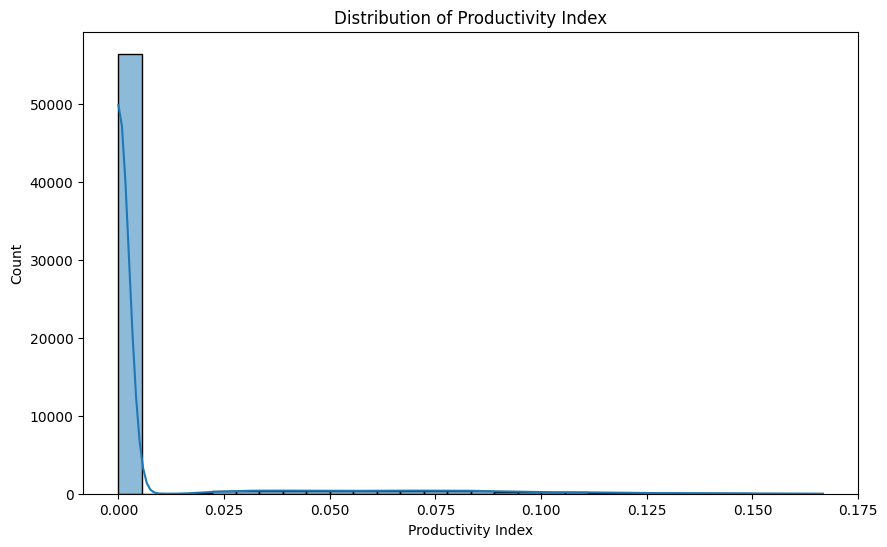

In [ ]:
# Visualize Productivity Index Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Productivity Index'], kde=True, bins=30)
plt.title('Distribution of Productivity Index')
plt.show()

In [ ]:
# Clustering Employees
cluster_features = ['Hours Worked', 'Performance Score', 'Satisfaction Level', 'Productivity Index']
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[cluster_features])

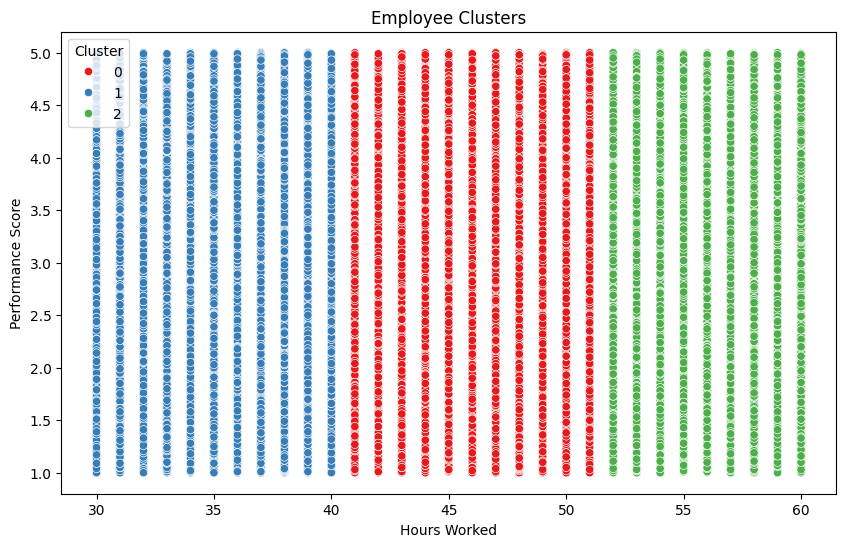

In [ ]:
# Cluster Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours Worked', y='Performance Score', hue='Cluster', palette='Set1', data=df)
plt.title('Employee Clusters')
plt.show()

In [ ]:
# Anomaly Detection using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso.fit_predict(df[['Hours Worked','Performance Score','Satisfaction Level','Productivity Index']])

In [ ]:
# Highlight Anomalies
anomalies = df[df['Anomaly'] == -1]
print('Detected Anomalies:')
print(anomalies[['Employee ID', 'Hours Worked', 'Performance Score', 'Satisfaction Level', 'Productivity Index']])

Detected Anomalies:
       Employee ID  Hours Worked  Performance Score  Satisfaction Level  \
0            37370            32               3.95                True   
4            37374            55               1.44                True   
18           37388            31               2.62                True   
36           37406            56               4.48                True   
87           37457            33               1.18                True   
...            ...           ...                ...                 ...   
62446        99816            60               3.23                True   
62472        99842            31               2.53                True   
62482        99852            35               4.00                True   
62563        99933            35               4.87                True   
62622        99992            37               1.48                True   

       Productivity Index  
0                0.123438  
4                0.0261

In [ ]:
# Predictive Modeling - Linear Regression
X = df[['Hours Worked', 'Satisfaction Level', 'Task Efficiency']]
y = df['Performance Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)


print('Linear Regression R2:', r2_score(y_test, y_pred))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2: -4.8087112670236465e-05
Linear Regression RMSE: 1.1591809007961933


In [ ]:
# Predictive Modeling - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest R2:', r2_score(y_test, y_pred_rf))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: -0.0014266343486046829
Random Forest RMSE: 1.1599795800439099


In [ ]:
# Feature Importance
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print(feat_importance.sort_values(by='Importance', ascending=False))

              Feature  Importance
0        Hours Worked    0.833526
1  Satisfaction Level    0.166474
2     Task Efficiency    0.000000


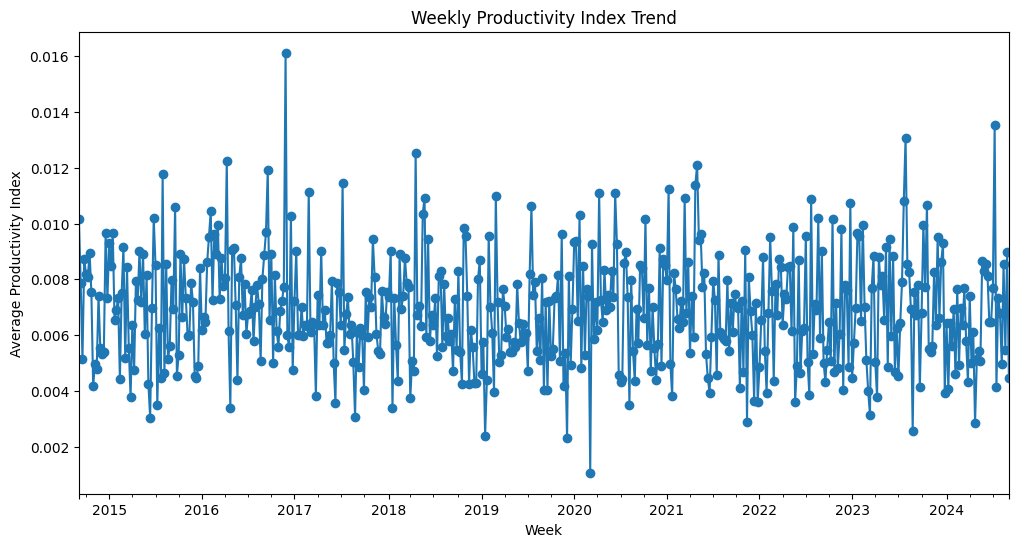

In [ ]:
# Time Series / Trend Analysis
# Ensure there is a 'Date' column in dataset
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')
weekly_trend = df.groupby(pd.Grouper(key='Joining Date', freq='W'))['Productivity Index'].mean()
plt.figure(figsize=(12,6))
weekly_trend.plot(marker='o')
plt.title('Weekly Productivity Index Trend')
plt.xlabel('Week')
plt.ylabel('Average Productivity Index')
plt.show()

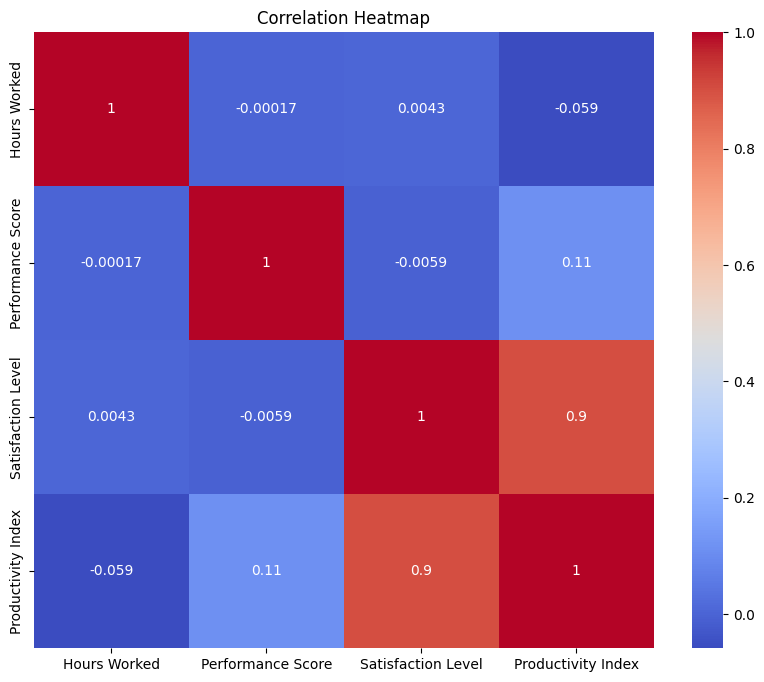

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['Hours Worked','Performance Score','Satisfaction Level','Productivity Index']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

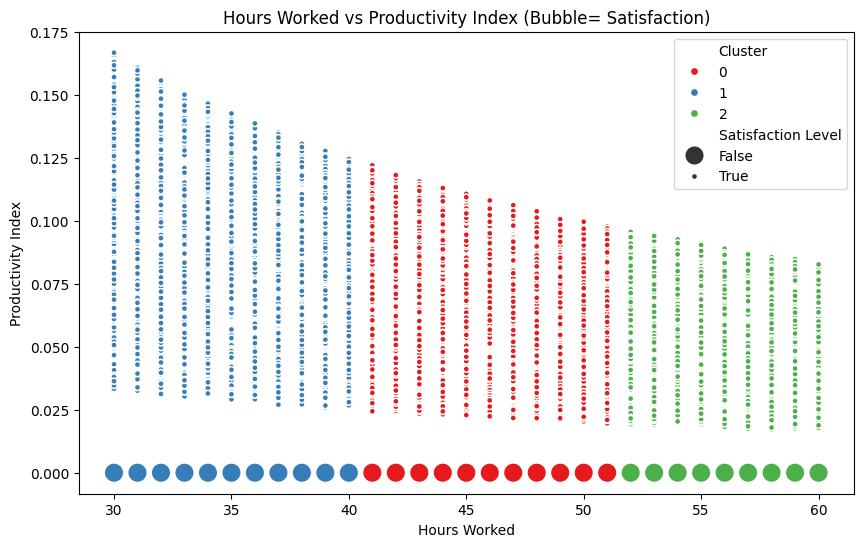

In [ ]:
# Optional: Bubble Chart Hours vs Productivity (size=satisfaction)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours Worked', y='Productivity Index', size='Satisfaction Level', hue='Cluster', data=df, palette='Set1', sizes=(20,200))
plt.title('Hours Worked vs Productivity Index (Bubble= Satisfaction)'
plt.show()

In [ ]:
# Save Cleaned Dataset for Google Sheets Dashboard
df.to_csv('employee_productivity_cleaned.csv', index=False)